<a href="https://colab.research.google.com/github/chrisfeltner/feltner-cop4630/blob/master/HW2/ChristopherFeltnerHomework2Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Problem 2
## Christopher Feltner

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Underfitting model
### The model is too simple to explain the data and there are too few epochs

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

epochs = 2
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 107us/sample - loss: 0.5991 - acc: 0.7993 - val_loss: 0.5073 - val_acc: 0.8251
Epoch 2/2
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4617 - acc: 0.8427 - val_loss: 0.4828 - val_acc: 0.8352


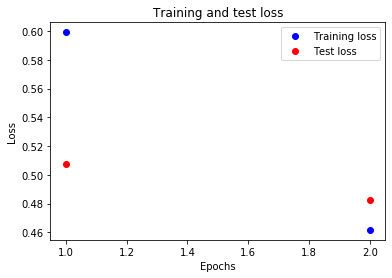

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

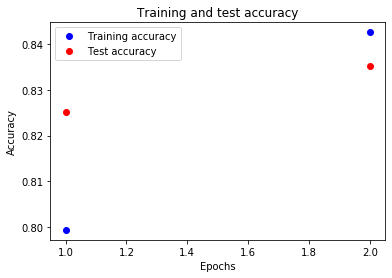

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfitting Model
### The model is unnecessarily complex and no dropout is used

In [0]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 158us/sample - loss: 0.4985 - acc: 0.8202 - val_loss: 0.4333 - val_acc: 0.8488
Epoch 2/30
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3755 - acc: 0.8651 - val_loss: 0.4729 - val_acc: 0.8283
Epoch 3/30
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3395 - acc: 0.8747 - val_loss: 0.3680 - val_acc: 0.8666
Epoch 4/30
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3176 - acc: 0.8831 - val_loss: 0.3911 - val_acc: 0.8634
Epoch 5/30
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2983 - acc: 0.8898 - val_loss: 0.3517 - val_acc: 0.8779
Epoch 6/30
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2796 - acc: 0.8966 - val_loss: 0.3627 - val_acc: 0.8683
Epoch 7/30
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2726 - acc: 0.8985 - val_

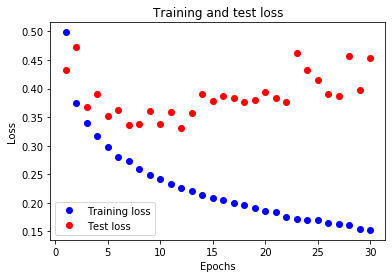

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

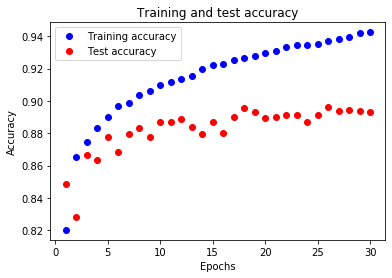

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Pretty Good Model
### Uses dropout to fight overfitting

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 129us/sample - loss: 0.6256 - acc: 0.7739 - val_loss: 0.4471 - val_acc: 0.8392
Epoch 2/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4838 - acc: 0.8248 - val_loss: 0.4078 - val_acc: 0.8518
Epoch 3/30
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4488 - acc: 0.8371 - val_loss: 0.3944 - val_acc: 0.8606
Epoch 4/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4331 - acc: 0.8426 - val_loss: 0.3787 - val_acc: 0.8638
Epoch 5/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4151 - acc: 0.8476 - val_loss: 0.3832 - val_acc: 0.8660
Epoch 6/30
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4067 - acc: 0.8536 - val_loss: 0.3793 - val_acc: 0.8648
Epoch 7/30
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3961 - acc: 0.8547 - val_l

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.3436 - acc: 0.8789
Test accuracy: 0.8789


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

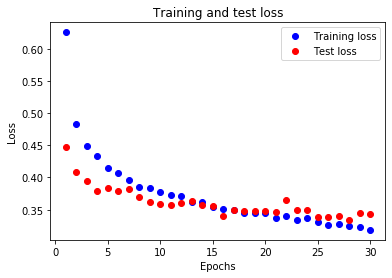

In [0]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

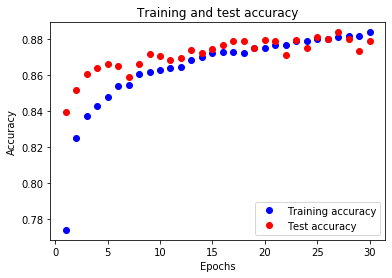

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()